In [1]:
import sqlite3
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score 
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

##### Read Data from the Database into pandas

In [2]:
# Create your connection.
cnx = sqlite3.connect('C:/Users/91758/Downloads/ML Project/database.sqlite/database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [3]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

In [5]:
df.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [6]:
df['preferred_foot'].value_counts()

right    138409
left      44733
Name: preferred_foot, dtype: int64

In [7]:
mod= df['attacking_work_rate'].mode()
mod=mod[0]
mod

'medium'

In [8]:
df['attacking_work_rate']=df['attacking_work_rate'].fillna(mod)

In [9]:
print("attacking_work_rate\n",df['attacking_work_rate'].value_counts())

attacking_work_rate
 medium    128300
high       42823
low         8569
None        3639
norm         348
y            106
le           104
stoc          89
Name: attacking_work_rate, dtype: int64


In [10]:
df['attacking_work_rate']= df['attacking_work_rate'].replace({'None':mod,'y':mod,'le':mod,'stoc':mod})

In [11]:
df['volleys'].unique()

array([44., 43., 40., 32., 29., 28., 30., 52., 51., 56., 63., 48., 47.,
       33., 77., 80., 34., 68., 67., 69., 14., 60., 59., 65., 64., 57.,
       25., 61., 79., 81., 78., 76., 74., 73., 70., 42., 41., 24., 55.,
       62., 36., 23., 72., nan, 58., 31., 66., 37., 46., 45., 49., 13.,
       39., 50., 53., 54., 35., 75., 71., 10., 11.,  5., 22., 21., 16.,
       38., 15., 27., 26., 12., 20.,  6., 18., 17.,  9., 19., 82., 84.,
       83., 87., 86., 85.,  4.,  8.,  7.,  2., 88., 89.,  3., 90., 91.,
        1., 93., 92.])

In [12]:
mean_volleys= round(df['volleys'].mean())
mean_volleys

49

In [13]:
df['volleys'].fillna(mean_volleys, inplace=True)

In [14]:
df['curve'].fillna(df['curve'].mean(), inplace=True)

In [15]:
l=['agility','balance','jumping','vision','sliding_tackle']
for i in l:
    df[i]= df[i].fillna(df[i].mean())

In [16]:
df.isnull().sum()

id                       0
player_fifa_api_id       0
player_api_id            0
date                     0
overall_rating         836
potential              836
preferred_foot         836
attacking_work_rate      0
defensive_work_rate    836
crossing               836
finishing              836
heading_accuracy       836
short_passing          836
volleys                  0
dribbling              836
curve                    0
free_kick_accuracy     836
long_passing           836
ball_control           836
acceleration           836
sprint_speed           836
agility                  0
reactions              836
balance                  0
shot_power             836
jumping                  0
stamina                836
strength               836
long_shots             836
aggression             836
interceptions          836
positioning            836
vision                   0
penalties              836
marking                836
standing_tackle        836
sliding_tackle           0
g

In [17]:
t=df[df['overall_rating'].isnull()]
t

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
483,484,33022,31684,2007-02-22 00:00:00,NaN,NaN,None,medium,None,NaN,...,57.87355,NaN,NaN,NaN,48.001462,NaN,NaN,NaN,NaN,NaN
983,984,111085,29904,2007-02-22 00:00:00,NaN,NaN,None,medium,None,NaN,...,57.87355,NaN,NaN,NaN,48.001462,NaN,NaN,NaN,NaN,NaN
1752,1753,165740,24159,2007-02-22 00:00:00,NaN,NaN,None,medium,None,NaN,...,57.87355,NaN,NaN,NaN,48.001462,NaN,NaN,NaN,NaN,NaN
2089,2090,176941,31916,2007-02-22 00:00:00,NaN,NaN,None,medium,None,NaN,...,57.87355,NaN,NaN,NaN,48.001462,NaN,NaN,NaN,NaN,NaN
2482,2483,177615,37249,2007-02-22 00:00:00,NaN,NaN,None,medium,None,NaN,...,57.87355,NaN,NaN,NaN,48.001462,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182587,182588,116368,25538,2007-02-22 00:00:00,NaN,NaN,None,medium,None,NaN,...,57.87355,NaN,NaN,NaN,48.001462,NaN,NaN,NaN,NaN,NaN
183249,183250,139865,32633,2007-02-22 00:00:00,NaN,NaN,None,medium,None,NaN,...,57.87355,NaN,NaN,NaN,48.001462,NaN,NaN,NaN,NaN,NaN
183309,183310,141272,33823,2007-02-22 00:00:00,NaN,NaN,None,medium,None,NaN,...,57.87355,NaN,NaN,NaN,48.001462,NaN,NaN,NaN,NaN,NaN
183361,183362,168650,25772,2007-02-22 00:00:00,NaN,NaN,None,medium,None,NaN,...,57.87355,NaN,NaN,NaN,48.001462,NaN,NaN,NaN,NaN,NaN


In [18]:
df.dropna(axis=0,inplace=True)

In [19]:
df.isnull().sum()

id                     0
player_fifa_api_id     0
player_api_id          0
date                   0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0


In [20]:
df.shape

(183142, 42)

In [21]:
print("defensive_work_rate\n",df['defensive_work_rate'].value_counts())

defensive_work_rate
 medium    130846
high       27041
low        18432
_0          2394
o           1550
1            441
ormal        348
2            342
3            258
5            234
7            217
6            197
0            197
9            152
4            116
es           106
ean          104
tocky         89
8             78
Name: defensive_work_rate, dtype: int64


In [22]:
mod1=df['defensive_work_rate'].mode()[0]
mod1

'medium'

In [23]:
df['defensive_work_rate']=df['defensive_work_rate'].replace({'_0':mod1,'o':mod1, '0':mod1, 'ormal':mod1})

In [24]:
df['defensive_work_rate']=df['defensive_work_rate'].replace({'1':'low','2':'low','3':'low','4':mod1,'5':mod1,'6':mod1,'7':mod1,'8':'high','9':'high','es':mod1,'ean':mod1,'tocky':mod1})

In [25]:
df['defensive_work_rate'].value_counts()

medium    136398
high       27271
low        19473
Name: defensive_work_rate, dtype: int64

In [26]:
l1=['preferred_foot','attacking_work_rate','defensive_work_rate']
le= LabelEncoder()
for i in l1:
    df[i]= le.fit_transform(df[i])

In [27]:
df.drop(['id','player_fifa_api_id','player_api_id','date'], axis=1, inplace=True)

In [28]:
df.head()

,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,67.0,71.0,1,2,2,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,67.0,71.0,1,2,2,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,62.0,66.0,1,2,2,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,61.0,65.0,1,2,2,48.0,43.0,70.0,60.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,61.0,65.0,1,2,2,48.0,43.0,70.0,60.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [29]:
cor= df.corr()
cor

,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
overall_rating,1.000000,0.766757,-0.002113,-0.158912,-0.150145,0.357699,0.329298,0.314099,0.458361,0.359113,...,0.428234,0.393189,0.133377,0.165349,0.128021,0.027976,0.004410,0.025682,0.005709,0.005687
potential,0.766757,1.000000,-0.003995,-0.136659,-0.086155,0.277755,0.286684,0.207706,0.382605,0.299314,...,0.376348,0.316414,0.055758,0.083822,0.063544,-0.011250,0.004742,0.089205,0.003406,0.003962
preferred_foot,-0.002113,-0.003995,1.000000,0.027095,-0.035627,-0.174888,0.011565,-0.005673,-0.074564,-0.012148,...,-0.039507,-0.016887,-0.095611,-0.091692,-0.098026,0.075587,0.078743,0.043615,0.076739,0.076379
attacking_work_rate,-0.158912,-0.136659,0.027095,1.000000,0.111076,-0.264166,-0.248733,-0.118902,-0.201092,-0.241315,...,-0.196148,-0.183484,-0.002814,-0.019699,-0.025038,0.173597,0.183489,0.154368,0.184595,0.185098
defensive_work_rate,-0.150145,-0.086155,-0.035627,0.111076,1.000000,-0.098684,-0.088326,-0.196379,-0.178197,-0.112166,...,-0.133693,-0.101526,-0.167528,-0.179153,-0.173299,0.156435,0.158850,0.104501,0.157546,0.155684
crossing,0.357699,0.277755,-0.174888,-0.264166,-0.098684,1.000000,0.576860,0.369747,0.790150,0.635018,...,0.690055,0.571473,0.235159,0.285265,0.274207,-0.603898,-0.595610,-0.349559,-0.597625,-0.601580
finishing,0.329298,0.286684,0.011565,-0.248733,-0.088326,0.576860,1.000000,0.373536,0.579365,0.847382,...,0.648410,0.720388,-0.284603,-0.229699,-0.259671,-0.479162,-0.465099,-0.287681,-0.470673,-0.473173
heading_accuracy,0.314099,0.207706,-0.005673,-0.118902,-0.196379,0.369747,0.373536,1.000000,0.548700,0.389532,...,0.335388,0.431336,0.461543,0.480624,0.439416,-0.665365,-0.647876,-0.391540,-0.647738,-0.651373
short_passing,0.458361,0.382605,-0.074564,-0.201092,-0.178197,0.790150,0.579365,0.548700,1.000000,0.636680,...,0.761002,0.609537,0.350171,0.415678,0.378833,-0.693313,-0.689528,-0.413317,-0.690702,-0.692926
volleys,0.359113,0.299314,-0.012148,-0.241315,-0.112166,0.635018,0.847382,0.389532,0.636680,1.000000,...,0.689850,0.708621,-0.168166,-0.106462,-0.126397,-0.506154,-0.484579,-0.274940,-0.488517,-0.490759


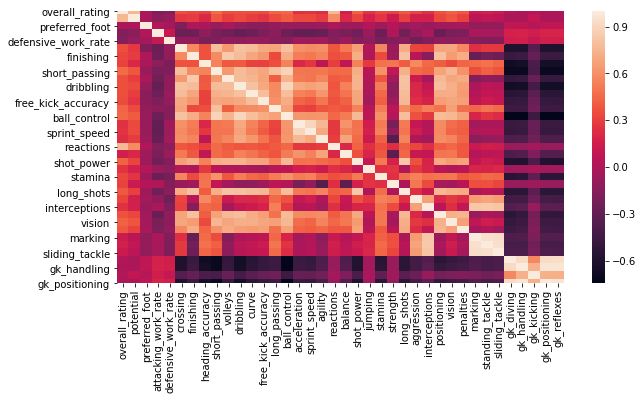

In [30]:
plt.figure(figsize=(10,5))
sns.heatmap(cor)

In [31]:
X=df
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [32]:
vif["features"]

0          overall_rating
1               potential
2          preferred_foot
3     attacking_work_rate
4     defensive_work_rate
5                crossing
6               finishing
7        heading_accuracy
8           short_passing
9                 volleys
10              dribbling
11                  curve
12     free_kick_accuracy
13           long_passing
14           ball_control
15           acceleration
16           sprint_speed
17                agility
18              reactions
19                balance
20             shot_power
21                jumping
22                stamina
23               strength
24             long_shots
25             aggression
26          interceptions
27            positioning
28                 vision
29              penalties
30                marking
31        standing_tackle
32         sliding_tackle
33              gk_diving
34            gk_handling
35             gk_kicking
36         gk_positioning
37            gk_reflexes
Name: featur

In [33]:
x= df[vif['features']]

In [34]:
x.head()

,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,67.0,71.0,1,2,2,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,67.0,71.0,1,2,2,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,62.0,66.0,1,2,2,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,61.0,65.0,1,2,2,48.0,43.0,70.0,60.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,61.0,65.0,1,2,2,48.0,43.0,70.0,60.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [35]:
y= x['overall_rating']
x=x.drop('overall_rating', axis=1)

In [36]:
x_train, x_test, y_train,y_test= train_test_split(x,y, test_size=0.2, random_state=34)

In [37]:
x_train.shape

(146513, 37)

In [38]:
x_test.shape

(36629, 37)

In [39]:
lr= LinearRegression()
lr.fit(x_train, y_train)
pred1= lr.predict(x_test)
print("Linear Regression")
print("RMSE :", sqrt(mean_squared_error(y_test,pred1)))
print("R2_score :", r2_score(y_test,pred1))

Linear Regression
RMSE : 2.7824461591456857
R2_score : 0.8442960518894326


In [40]:
dt= DecisionTreeRegressor()
dt.fit(x_train, y_train)
pred2= dt.predict(x_test)
print("Decision Tree Regressor")
print("RMSE :", sqrt(mean_squared_error(y_test,pred2)))
print("R2_score :", r2_score(y_test,pred2))

Decision Tree Regressor
RMSE : 1.3623712522753773
R2_score : 0.9626718017592567


In [41]:
rf= RandomForestRegressor()
rf.fit(x_train, y_train)
pred3= rf.predict(x_test)
print("Random Forest Regressor")
print("RMSE :", sqrt(mean_squared_error(y_test,pred3)))
print("R2_score :", r2_score(y_test,pred3))

C:\Users\91758\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Regressor
RMSE : 1.0195992777507212
R2_score : 0.9790923546634481


In [42]:
y1= df['overall_rating']
x1=df.drop('overall_rating', axis=1)

In [43]:
x_train1, x_test1, y_train1,y_test1= train_test_split(x1,y1, test_size=0.2, random_state=34)

In [44]:
rf1= RandomForestRegressor()
rf1.fit(x_train1, y_train1)
pred4= rf1.predict(x_test1)
print("Random Forest Regressor")
print("RMSE :", sqrt(mean_squared_error(y_test1,pred4)))
print("R2_score :", r2_score(y_test1,pred4))

C:\Users\91758\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Regressor
RMSE : 1.0076153812065847
R2_score : 0.979580943877294
